# Object Detection Demo (use any of the following)

【名词解释】  

COCO -- COCO数据集有超过 200,000 张图片，80种物体类别. 所有的物体实例都用详细的分割mask进行了标注，共标注了超过 500,000 个物体实体. 
MobileNet-SSD detection network

OID -- Open Images Dataset.
Open Images is a dataset of ~9 million URLs to images that have been annotated with image-level labels and bounding boxes spanning thousands of classes. bbox trainable classes are 545

atrous -- [atrous convolution](https://www.zhihu.com/question/49630217/answer/269444489)带洞卷积的有效性基于一个假设：紧密相邻的像素几乎相同，全部纳入属于冗余，不如跳H(hole size)个取一个。

# Download model

For a list of models, visit:   
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md   or  
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [1]:
from odn import utils

utils.download_tf_model('http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz')
# tf2 model throws DecodeError: Wrong wire type in tag. May need to upgrade protoc versionn. 

C:\Users\eleve\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\eleve\Documents\codex\py\keras\8. Object Detection/efficientdet_d3_coco17_tpu-32.tar.gz


## Load a (frozen) Tensorflow model and label map


Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [2]:
!protoc --version

libprotoc 3.17.2


In [3]:
from odn import utils

detection_graph, category_index = utils.load_tf_graph(
    ckpt_path = '../src/odn/models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb',
    label_path = '../src/odn/models/mscoco_label_map.pbtxt', 
    num_classes = 90, verbose = True)

category_index:  {1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: 

# Detection

In [5]:
import os

PATH_TO_TEST_IMAGES_DIR = '../data/generic'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 7) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

TEST_IMAGE_PATHS

['../data/generic\\image1.jpg',
 '../data/generic\\image2.jpg',
 '../data/generic\\image3.jpg',
 '../data/generic\\image4.jpg',
 '../data/generic\\image5.jpg',
 '../data/generic\\image6.jpg']

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

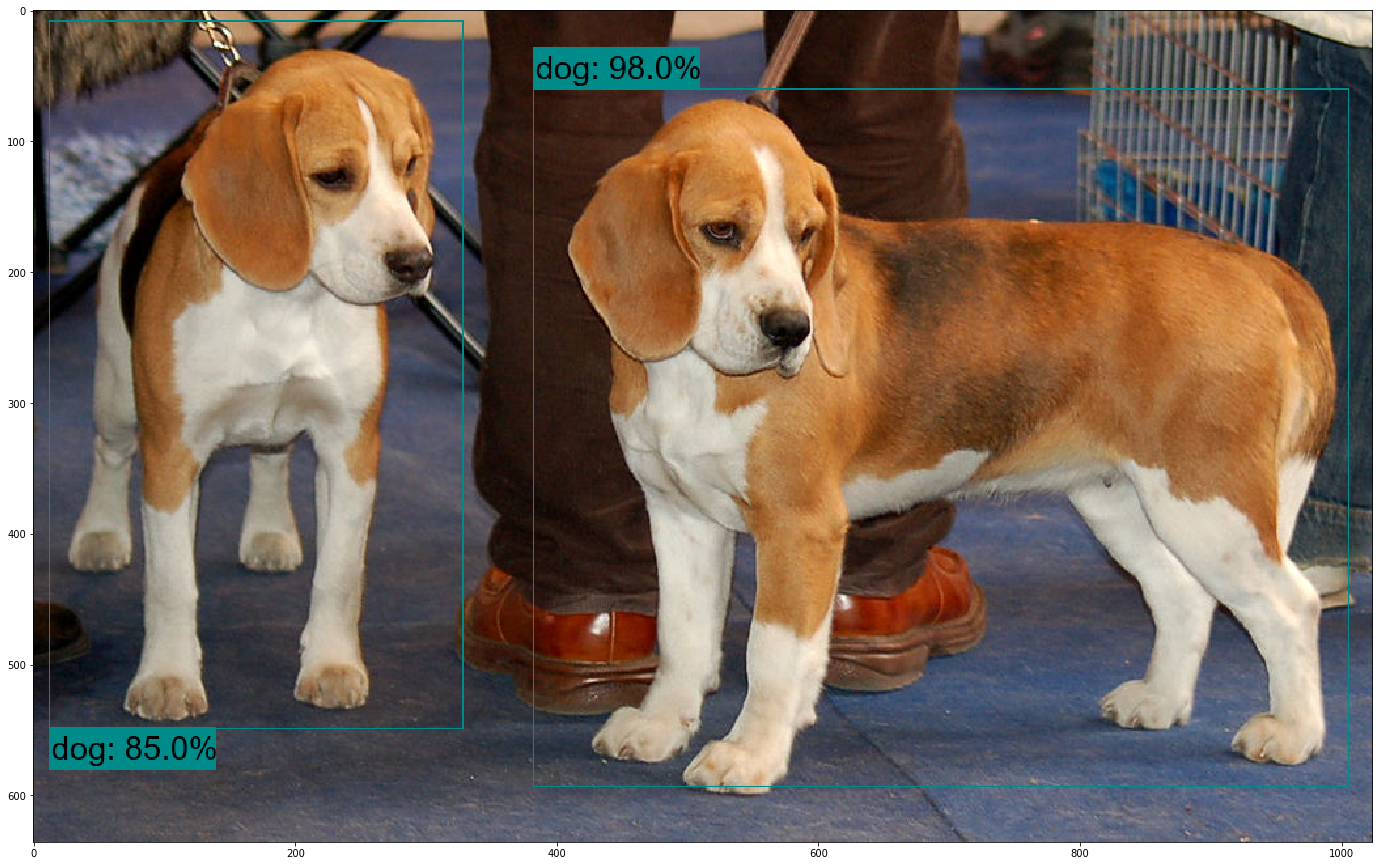

 17%|██████████████                                                                      | 1/6 [00:10<00:54, 10.92s/it]

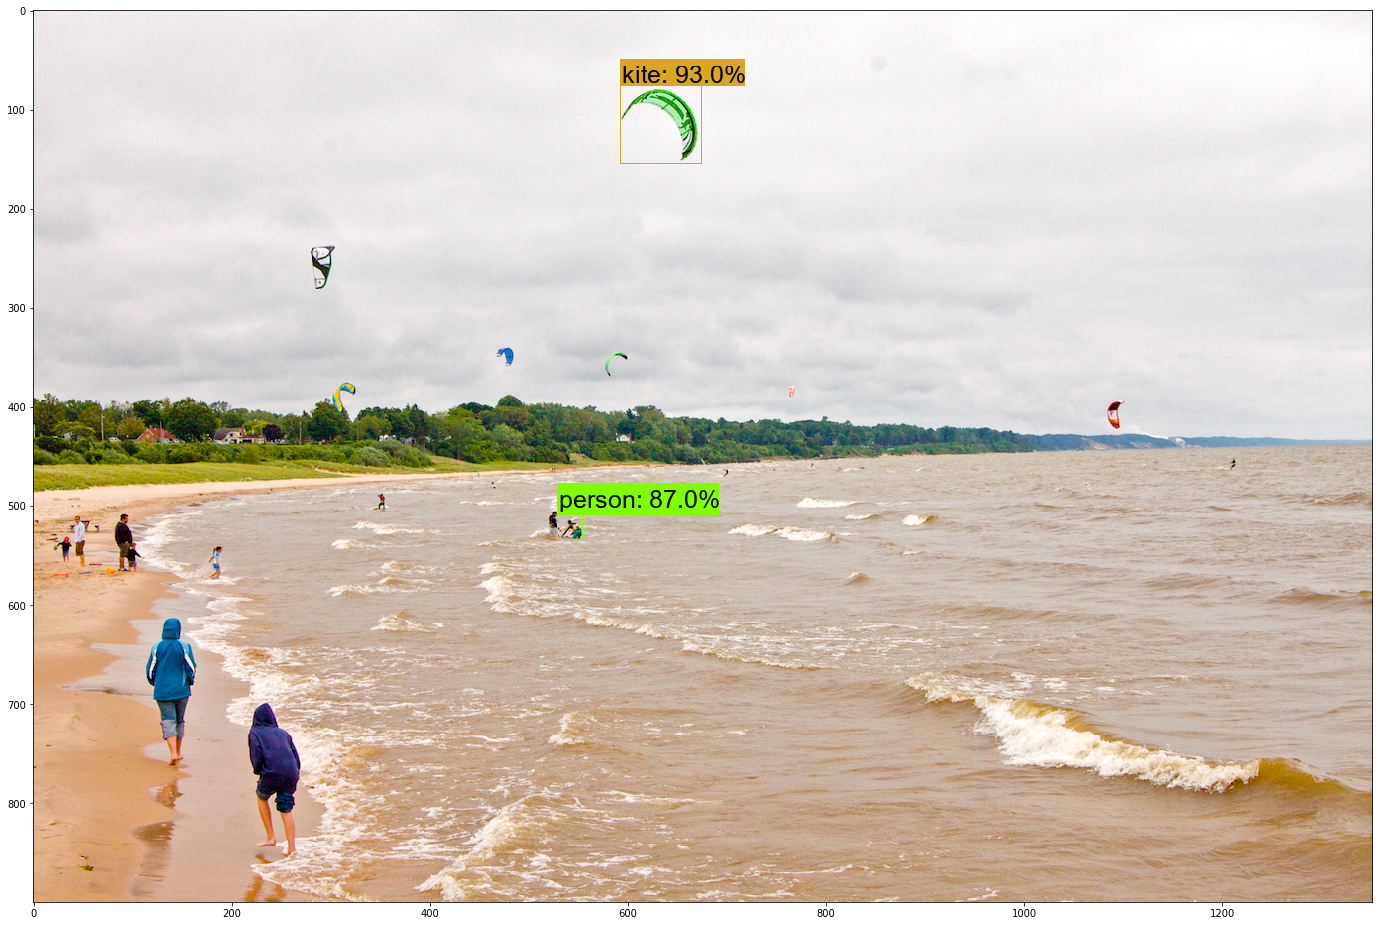

 33%|████████████████████████████                                                        | 2/6 [00:14<00:34,  8.62s/it]

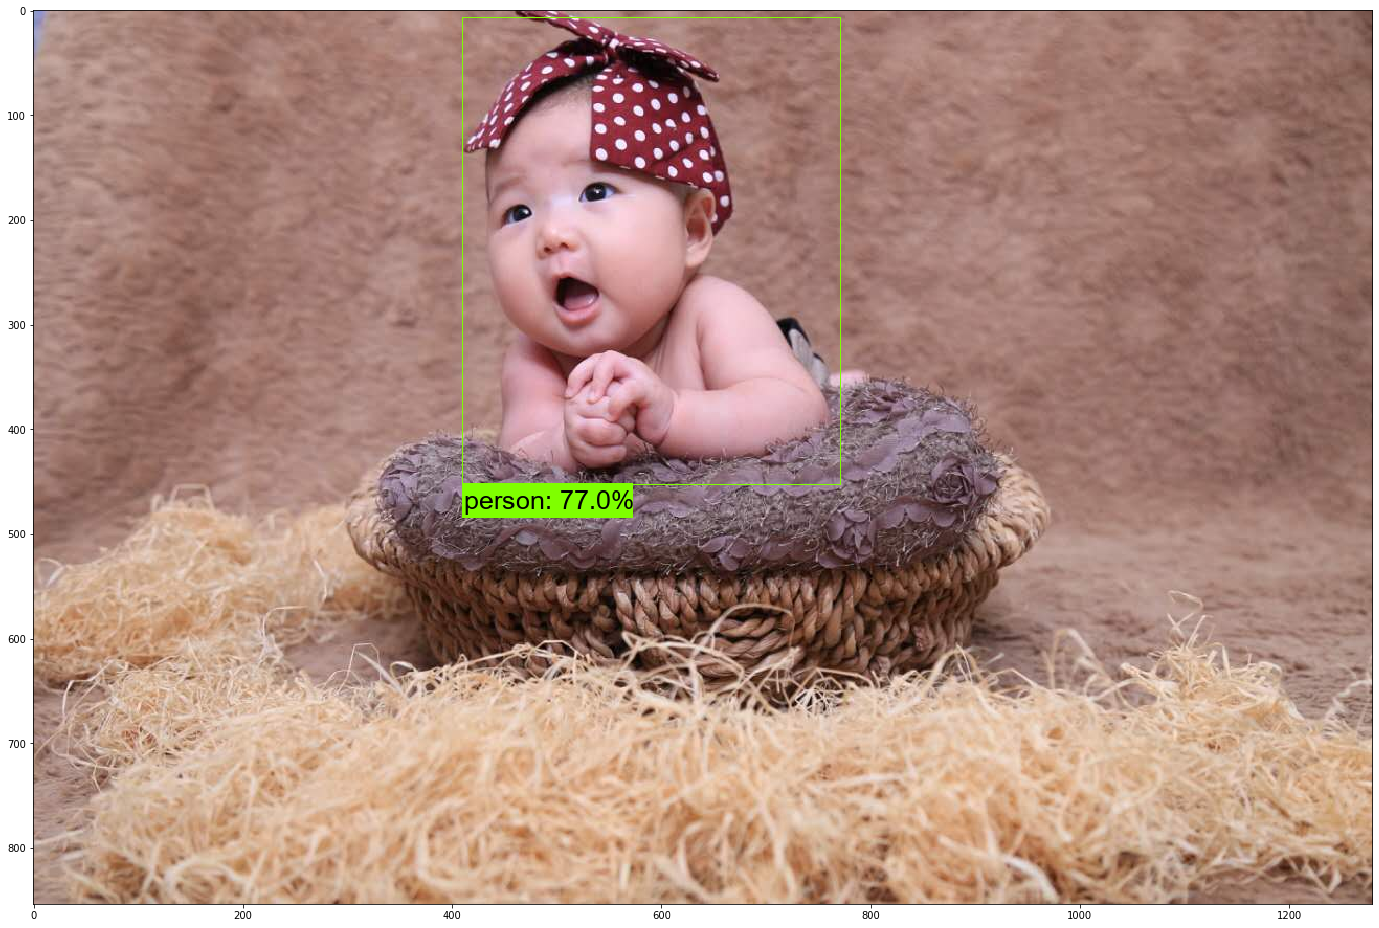

 50%|██████████████████████████████████████████                                          | 3/6 [00:16<00:20,  6.79s/it]

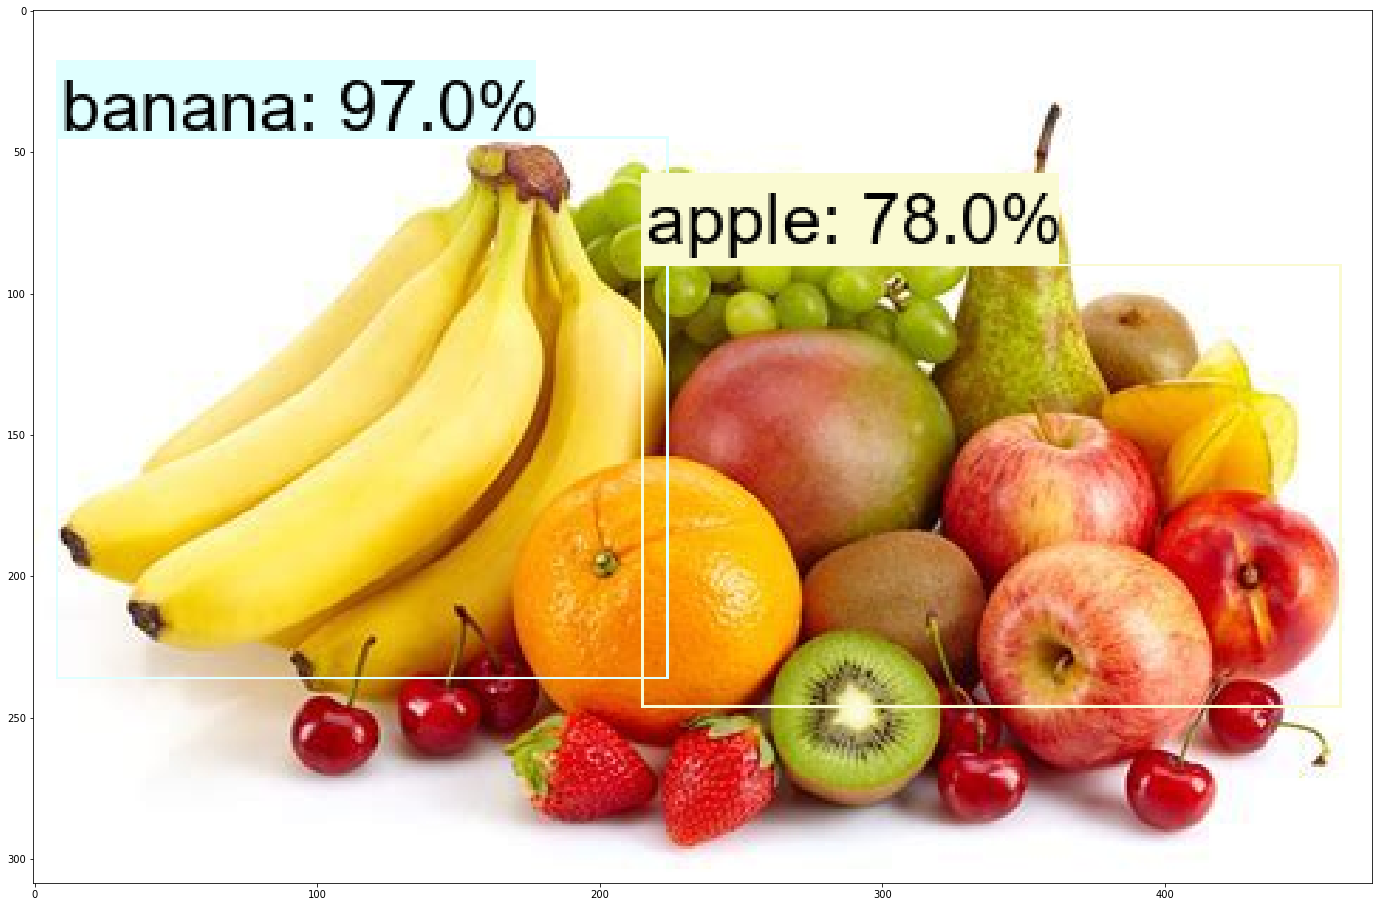

 67%|████████████████████████████████████████████████████████                            | 4/6 [00:17<00:09,  4.94s/it]

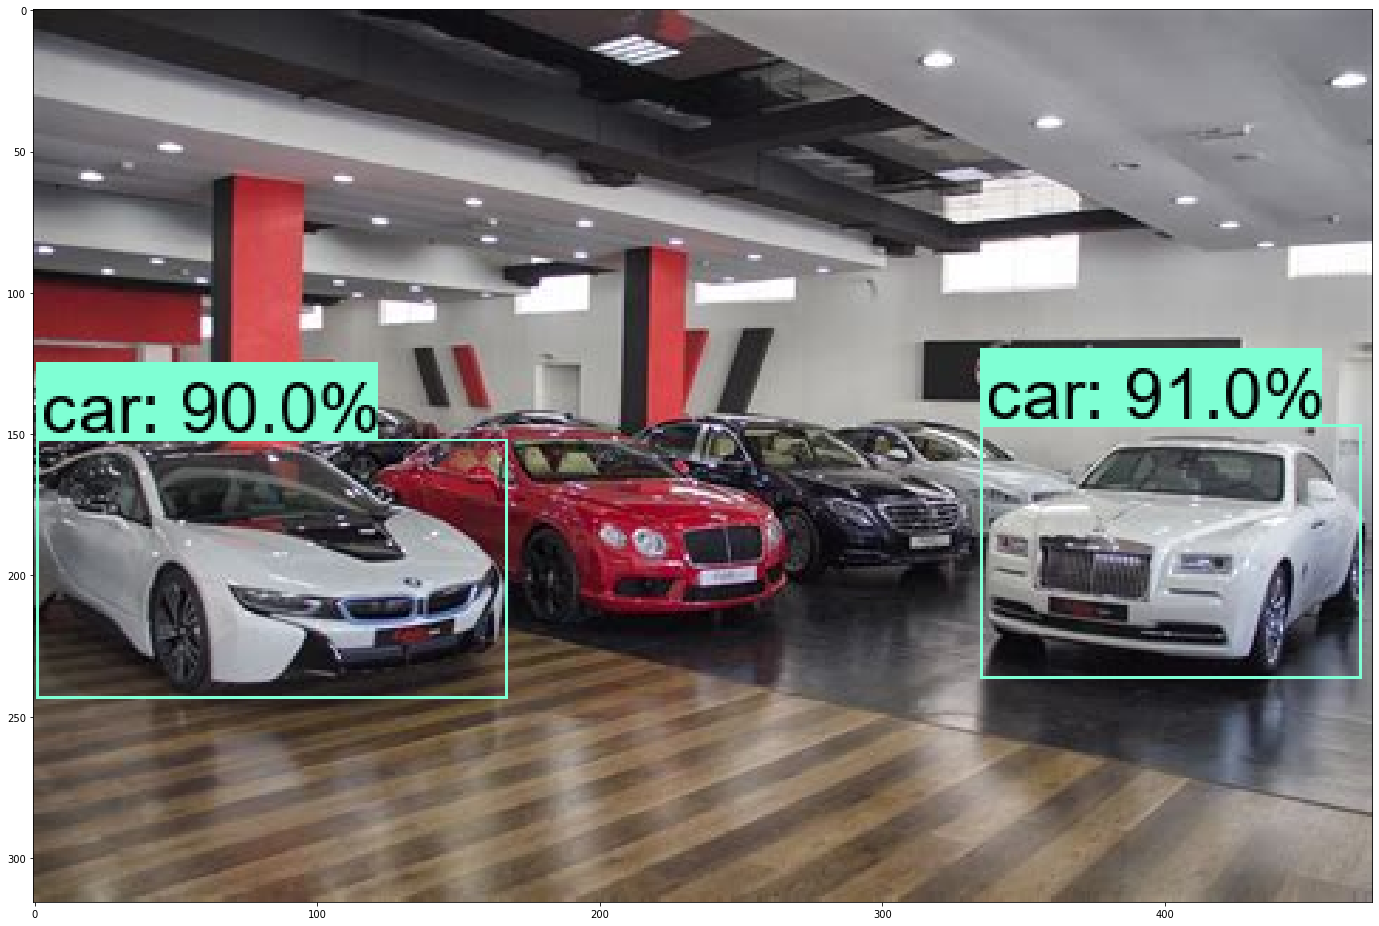

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:17<00:03,  3.65s/it]

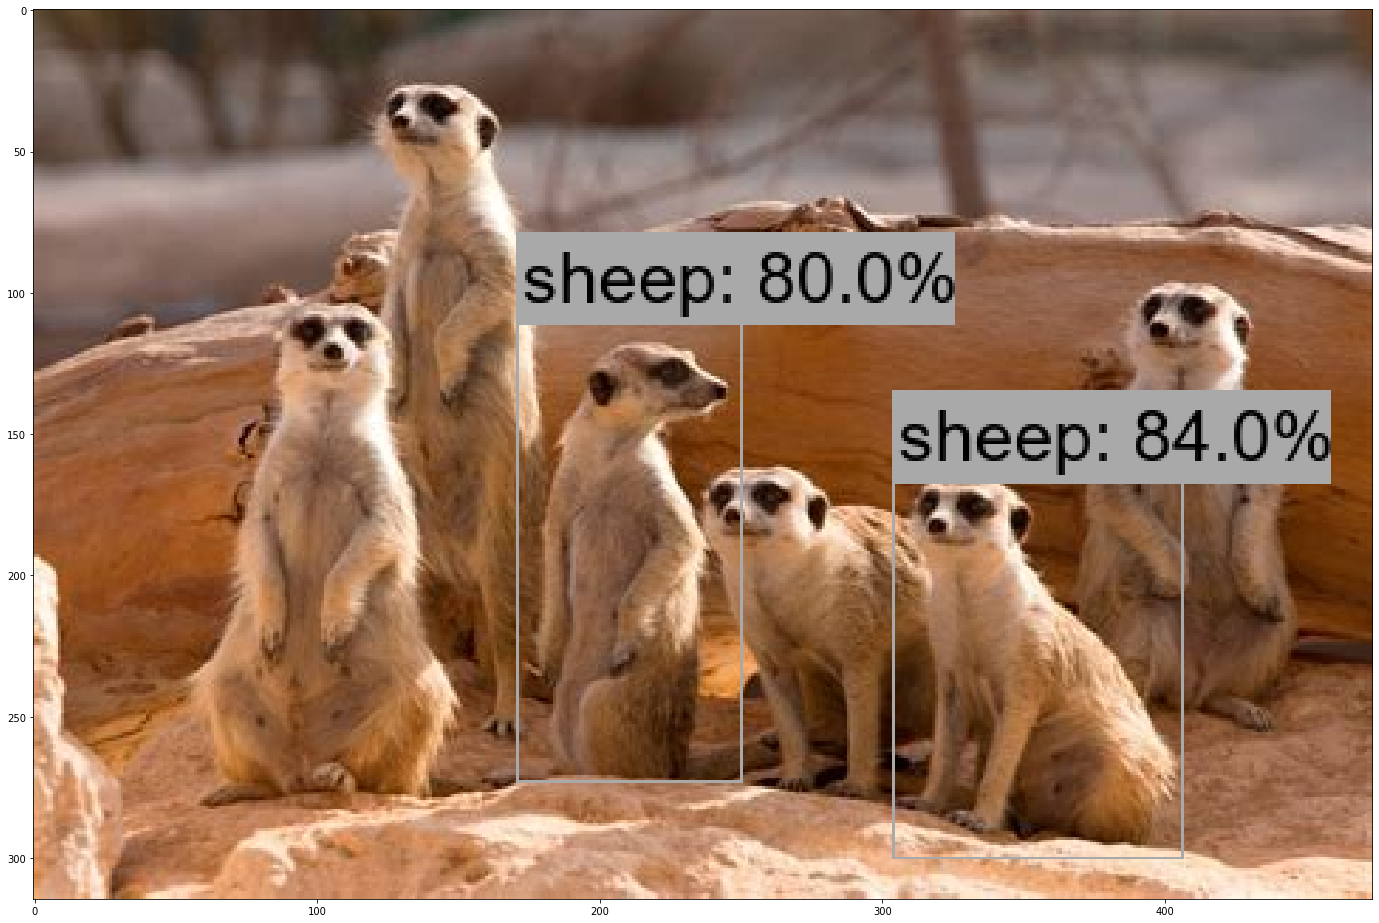

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:18<00:00,  3.12s/it]


In [7]:
from odn import utils
%matplotlib inline

utils.tf_batch_object_detection(detection_graph, category_index, TEST_IMAGE_PATHS, 
                            target_folder = None, log_file = None,
                            display = True, savefile = False, 
                            IMAGE_SIZE = (24, 18), threshold = 0.5, 
                            new_img_width = None,
                            fontsize = None)